**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [4]:
!pip install pyts
from pyts.datasets import make_cylinder_bell_funnel

     |████████████████████████████████| 2.5MB 8.2MB/s 


[[ 1.16630275  0.56844101  0.59959411 ... -0.85373653  0.3592094
   0.55682084]
 [ 1.87200568 -0.01944214 -0.93259166 ...  0.3409222  -0.08641351
   0.27563516]
 [-0.21037016 -0.59477625 -1.28129767 ... -2.87128266 -0.16090491
   0.90017699]
 ...
 [ 0.27872303 -2.4522646  -0.90129382 ...  0.23732438  0.2735774
  -0.7240018 ]
 [ 1.78082921 -1.63295228 -0.57276842 ...  0.67997308  0.57546867
  -0.25268569]
 [-1.84490524 -1.01719217  0.51666931 ...  1.28626861  1.06220985
  -0.45374431]]
[2 0 2 0 1 1 2 0 1 0 2 1]


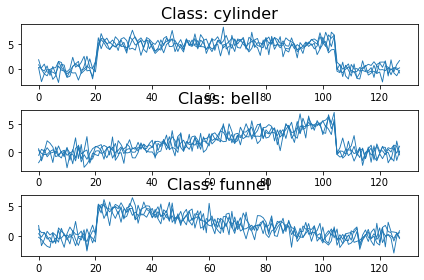

In [7]:
X, y = make_cylinder_bell_funnel(n_samples=12, random_state=42)
print (X)
print (y)
plt.figure()
for i, classe in enumerate(['cylinder', 'bell', 'funnel']):
    plt.subplot(3, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [0]:
X.shape

# Shapelet Discovery

https://tslearn.readthedocs.io/en/latest/gen_modules/shapelets/tslearn.shapelets.ShapeletModel.html#tslearn.shapelets.ShapeletModel

https://www.kaggle.com/group16/shapelets

In [0]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [0]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

In [0]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [0]:
shp_clf.fit(X, y)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
predicted_labels = shp_clf.predict(X)
print("Correct classification rate:", accuracy_score(y, predicted_labels))

In [0]:
predicted_locations = shp_clf.locate(X)

In [0]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

## Shaplet Discovery 2

In [0]:
from shapelets_lts.classification import LtsShapeletClassifier

https://github.com/mohaseeb/shaplets-python

In [0]:
shp_clf = LtsShapeletClassifier(
    K=10,
    R=1,
    L_min=10,
    epocs=10,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=False
)
"""
:param K: number of shapelets
:param R: scales of shapelet lengths
:param L_min: minimum shapelet length
"""

In [0]:
shp_clf.fit(X, y)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_pred = shp_clf.predict(X)

print("Correct classification rate:", accuracy_score(y, y_pred))

In [0]:
# retrieve the learnt shapelets
shapelets = shp_clf.get_shapelets()

# and plot sample shapelets
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

In [0]:
len(shapelets)

In [0]:
shapelets

## Shaplet Discovery 3

In [0]:
from pyts.transformation import ShapeletTransform

https://pyts.readthedocs.io/en/stable/generated/pyts.transformation.ShapeletTransform.html#pyts.transformation.ShapeletTransform

In [0]:
st = ShapeletTransform(n_shapelets=3, window_sizes=[8])
st.fit(X, y)

In [0]:
len(st.shapelets_)

In [0]:
st.shapelets_

In [0]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

The indices for the corresponding shapelets in the training set. The first column consists of the indices of the samples. The second column consists of the starting indices (included) of the shapelets. The third column consists of the ending indices (excluded) of the shapelets.

In [0]:
st.indices_

In [0]:
X[2][55:63]

In [0]:
st.scores_

## Shaplet Discovery 4

In [0]:
from pyts.classification import LearningShapelets

https://pyts.readthedocs.io/en/stable/generated/pyts.classification.LearningShapelets.html#pyts.classification.LearningShapelets

In [0]:
shp_clf = LearningShapelets(random_state=42, tol=0.01)

In [0]:
shp_clf.fit(X, y)

In [0]:
len(shp_clf.shapelets_[0])

In [0]:
from pyts.utils import windowed_view

In [0]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

In [0]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [0]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 2, axis=3).min(axis=1)

In [0]:
X_dist

In [0]:
np.mean(X_dist[y == 0], axis=0)

In [0]:
np.mean(X_dist[y == 1], axis=0)

In [0]:
np.mean(X_dist[y == 2], axis=0)

# Matrix Profile

https://github.com/target/matrixprofile-ts

https://github.com/TDAmeritrade/stumpy

In [0]:
from matrixprofile import *

In [0]:
plt.plot(ts)
plt.show()

In [0]:
w = 12
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

In [0]:
window = 12
ts_log_mov_diff = pd.Series(np.log(ts) - np.log(ts).rolling(window, center=False).mean(), index=ts.index)

plt.plot(ts_log_mov_diff)
plt.show()

In [0]:
w = 12
mp, mpi = matrixProfile.stomp(ts_log_mov_diff.values[11:], w)

plt.plot(mp)
plt.show()

In [0]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

# Motif Discovery

In [0]:
#mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

Parameters
- max_motifs: stop finding new motifs once we have max_motifs
- radius: For each motif found, find neighbors that are within radius*motif_mp of the first.
- n_neighbors: number of neighbors from the first to find. If it is None, find all.
- ex_zone: minimum distance between indices for after each subsequence is identified. Defaults to m/2 where m is the subsequence length. If ex_zone = 0, only the found index is exclude, if ex_zone = 1 then if idx is found as a motif idx-1, idx, idx+1 are excluded.

Returns
The function returns a tuple (top_motifs, distances) which are lists of the same length.

- top_motifs: This is a list of the indices found for each motif. The first index is the nth motif followed by all nearest neighbors found sorted by distances.
- distances: Minimum Matrix profile value for each motif set.

In [0]:
mo

In [0]:
mod

In [0]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [0]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# Anomaly Discovery

In [0]:
from matrixprofile.discords import discords

Parameters  
- mp: matrix profile numpy array
- k: the number of discords to discover
- ex_zone: the number of samples to exclude and set to Inf on either side of a found discord    

Returns 
 - a list of indexes represent the discord starting locations. MaxInt indicates there were no more discords that could be found due to too many exclusions or profile being too small. Discord start indices are sorted by highest matrix profile value.

In [0]:
anoms = discords(mp, ex_zone=3, k=5)

In [0]:
anoms

In [0]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()